**Import the required packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Read the data**

In [2]:
file_location="C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\Visadataset.csv"
visa_df=pd.read_csv(file_location)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Categorical vs Categorical**

In [3]:
# Column name: continent
# Output column: case_status
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [4]:
# I want to know out of 16861 members how many got the visa
# we are analysing continent and case status
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con=con1&con2
len(visa_df[con])

11012

In [5]:
visa_df[(visa_df['continent']=='Asia')&(visa_df['case_status']=='Certified')]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [6]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Denied'
con=con1&con2
len(visa_df[con])

5849

In [7]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con3=visa_df['case_status']=='Denied'
cert_con=con1&con2
denied_con=con1&con3
len(visa_df[cert_con]),len(visa_df[denied_con])
print(f"{len(visa_df[cert_con])} are got the Visa from Asia")
print(f"{len(visa_df[denied_con])} are got rejected the Visa from Asia")

11012 are got the Visa from Asia
5849 are got rejected the Visa from Asia


In [8]:
labels=visa_df['continent'].value_counts().keys()
# cert
# den
for i in labels:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert_con=con1&con2
    denied_con=con1&con3
    print(f"{len(visa_df[cert_con])} are got the Visa from {i}")
    print(f"{len(visa_df[denied_con])} are got rejected the Visa from {i}")

11012 are got the Visa from Asia
5849 are got rejected the Visa from Asia
2957 are got the Visa from Europe
775 are got rejected the Visa from Europe
2037 are got the Visa from North America
1255 are got rejected the Visa from North America
493 are got the Visa from South America
359 are got rejected the Visa from South America
397 are got the Visa from Africa
154 are got rejected the Visa from Africa
122 are got the Visa from Oceania
70 are got rejected the Visa from Oceania


In [9]:
labels=visa_df['continent'].value_counts().keys()
certified=[]
denied=[]
for i in labels:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert_con=con1&con2
    denied_con=con1&con3
    certified.append(len(visa_df[cert_con]))
    denied.append(len(visa_df[denied_con]))

d1=pd.DataFrame(zip(labels,certified,denied),
             columns=['Continent','Certified','Denied'])
d1.set_index('Continent')

,Certified,Denied
Continent,,
Asia,11012,5849
Europe,2957,775
North America,2037,1255
South America,493,359
Africa,397,154
Oceania,122,70


**pd.crosstab**

In [11]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1=pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

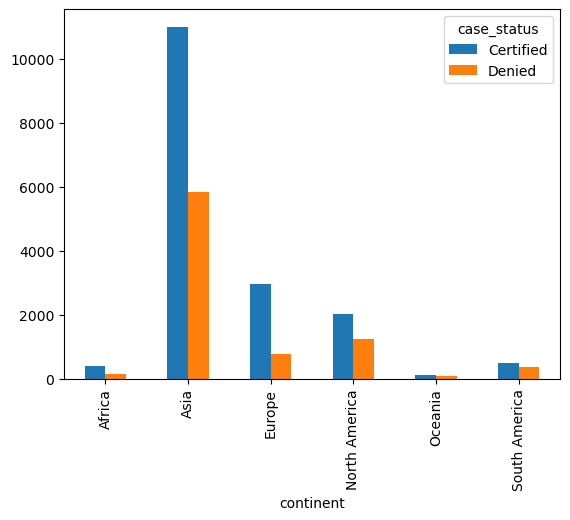

In [13]:
result1.plot(kind='bar')

In [ ]:
# continent, education of employee and case status

In [14]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [21]:
col1=visa_df['continent']
col2=[visa_df['case_status'],
      visa_df['education_of_employee']]
result2=pd.crosstab(col1,col2)
result2

# col1 is generaly index
# col2 is columns

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

In [16]:
visa_df['education_of_employee'].unique()

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)

In [ ]:
# From Asia 16k applied for Visa
# In that  11k got the visa. 5k Rejected
# in that 11k how many HS, M,B,D
# in that 5k how many hs,M,B,D

<Axes: xlabel='continent'>

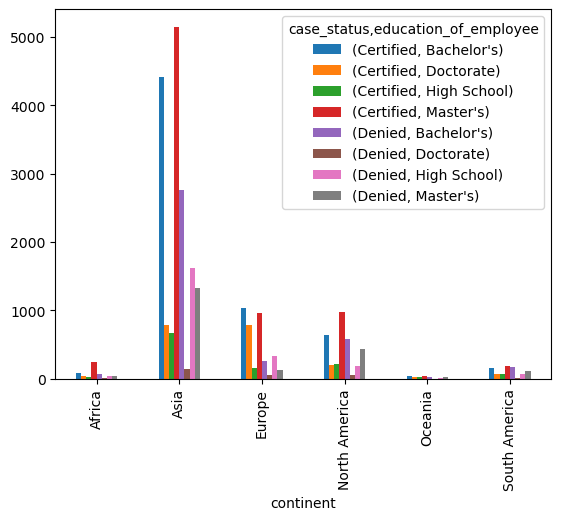

In [22]:
result2.plot(kind='bar')

<Axes: xlabel='education_of_employee'>

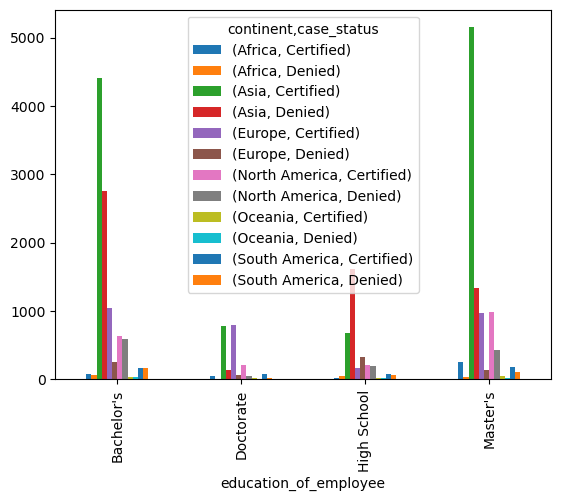

In [23]:
col1=visa_df["education_of_employee"]
col2=[visa_df["continent"],visa_df['case_status']]
result3=pd.crosstab(col1,col2)
result3.plot(kind='bar')

**Numerical vs Numerical**

$Scatter$-$plots$:
    
   - plt.scatter
    
   - will take two arguments x-axis and y-axis
    
   - Both variables should be numerical
    
   - It provides relationship between two variables
    
       - Positvely related
        
       - Negatively related
        
       - No relation

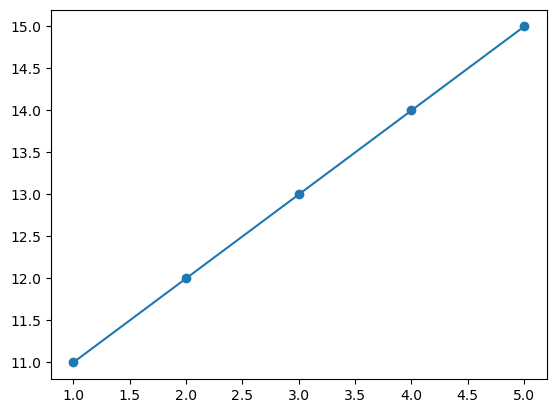

In [28]:
x=[1,2,3,4,5]
y=[11,12,13,14,15]

# (1,11) (2,12) (3,13) (4,14) (5,15)
plt.scatter(x,y)
plt.plot(x,y)

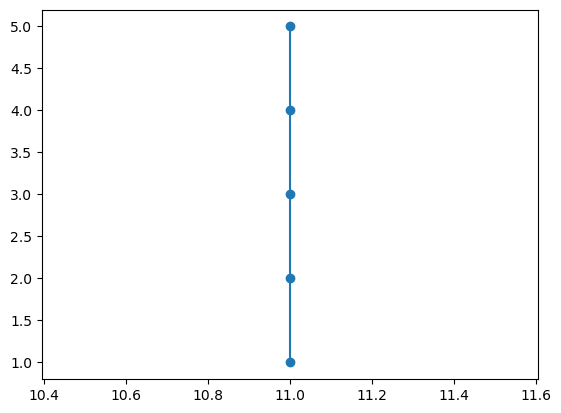

In [45]:
x=[1,2,3,4,5]
y=[11,11,11,11,11]

# (1,11) (2,12) (3,13) (4,14) (5,15)
plt.scatter(y,x)
plt.plot(y,x)

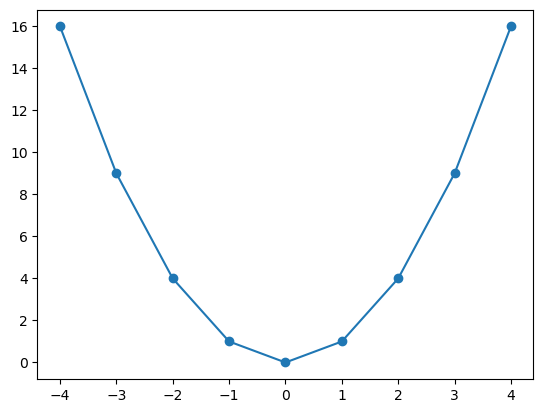

In [33]:
x=[i for i in range(-4,5)]
y=[i*i for i in range(-4,5)]
plt.scatter(x,y)
plt.plot(x,y)

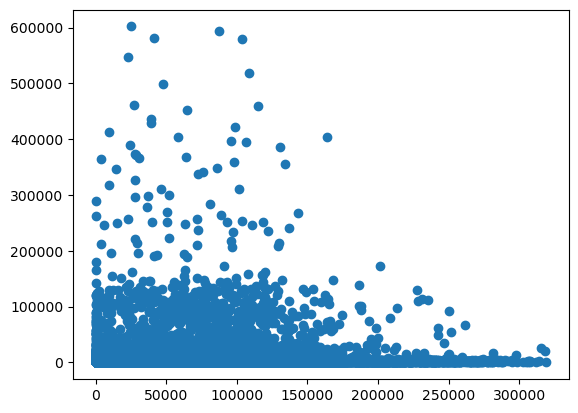

In [34]:
# Apply scatter plot on two numerical columns from visa df
# col1: Prevailiang wage
# col2: Number of employees
x=visa_df['prevailing_wage']
y=visa_df["no_of_employees"]
plt.scatter(x,y)
#plt.plot(con2,con1)

**Correlation-Coefiecient**

   - Denoted with r

   - Pearson correlation coefficient

   - r varies from -1 to 1

   - r= -1 to 0 : Negatively correlated

   - r= 0 to 1: Postively Correlated

   - r=0 : No relation

<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="25" data-atf="0">

In [36]:
# visa_df is your dataframe name
visa_df.corr(numeric_only=True)

# Imagine you have 10 Columns  10*10=100

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


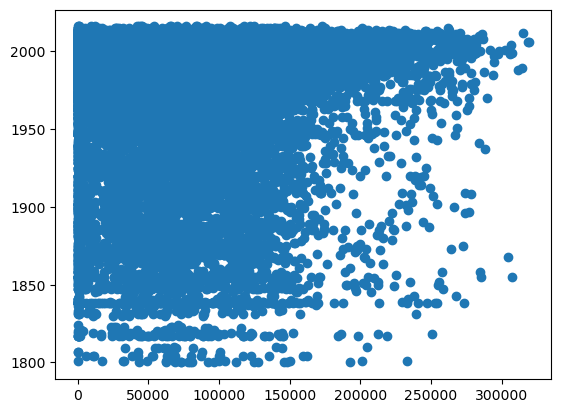

In [37]:
x=visa_df['prevailing_wage'] # 25480
y=visa_df["yr_of_estab"]     # 25480
plt.scatter(x,y)

(x,y)
#Sir on tha above graph how we got multiple y value on single x value??

In [38]:
file_location="C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv"
wine_df=pd.read_csv(file_location)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


$Heatmap$

In [41]:
#sns.heatmap(<cov matrix>)
# heatmap avialable from seaborn package
# In this partcular visadf correlation
# Line your right side min=0  max=1
# entrire matrix value ranges  0 to 1

<Axes: >

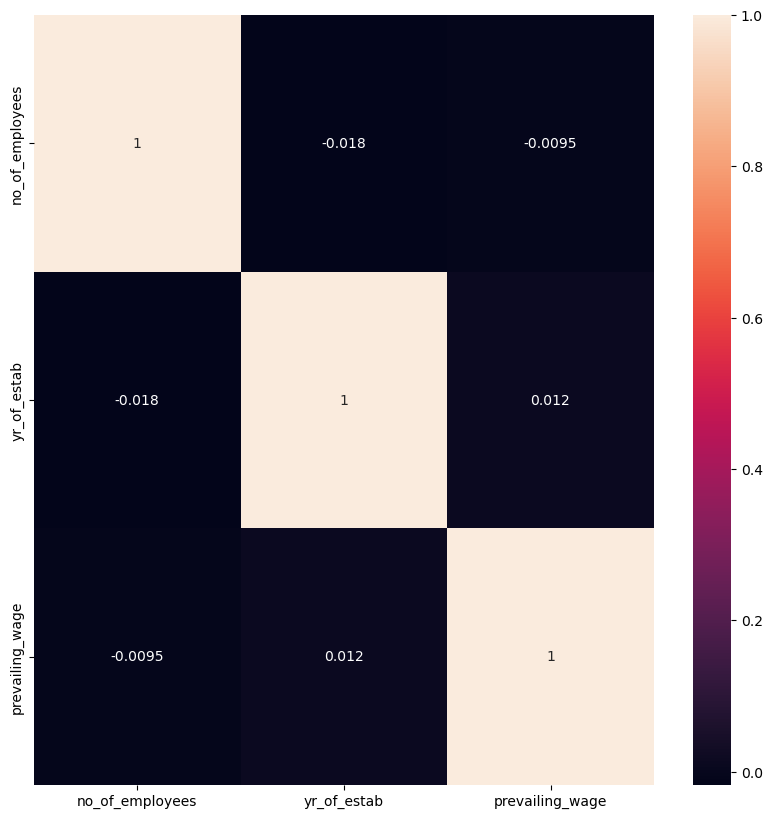

In [51]:
plt.figure(figsize=(10,10))
corr=visa_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

<Axes: >

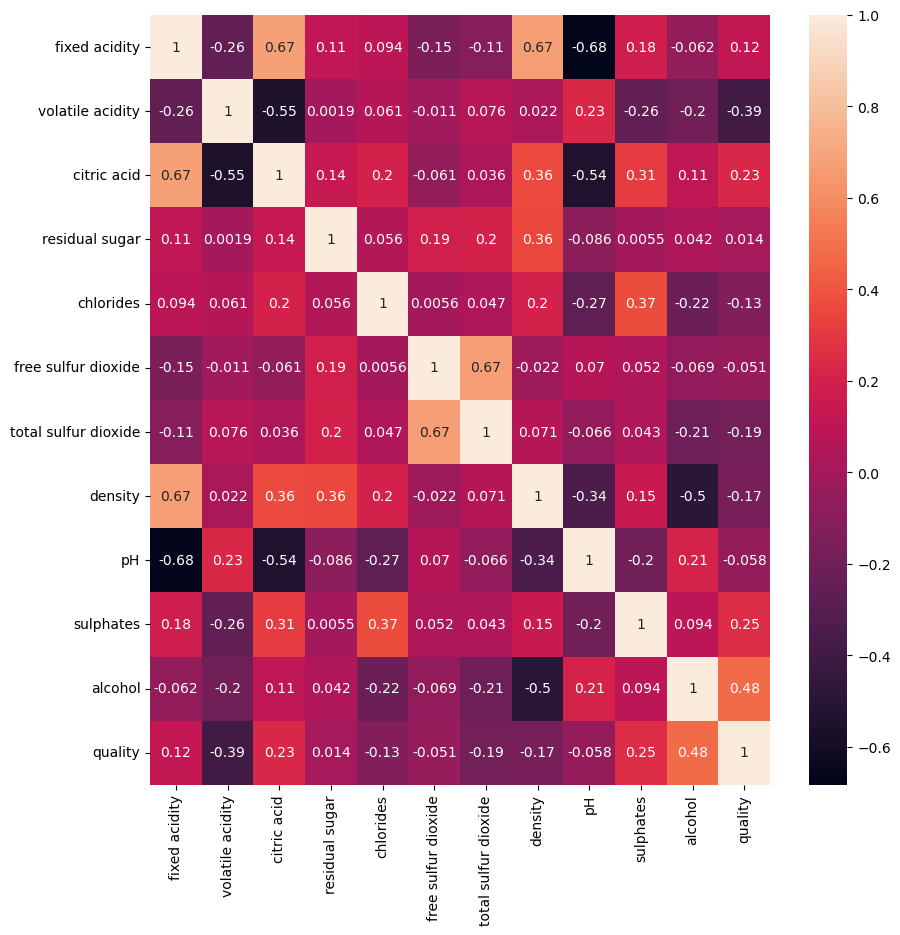

In [48]:
plt.figure(figsize=(10,10))
corr=wine_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

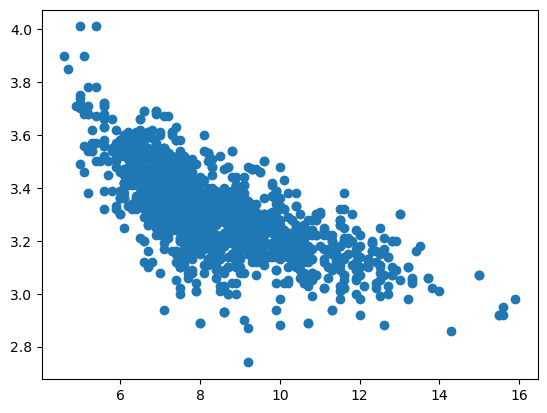

In [50]:
plt.scatter(wine_df['fixed acidity'],wine_df['pH'])


**EDA-Session1**

   - We just read the data
    
   - How to create data frames using list and dict
    
   - How to add new column 
    
   - How to add new rows
    
   - How to drop columns and rows
    
   - How to change the index
    
   - How to save the data frame local
    
**EDA-Session2**:
    
   - We read the data
    
   - shape,size,len,head,tail
    
   - columns,dtypes,info
    
   - Seperated Cat and num columns
    
**EDA-Session3**: Categorical column analysis
    
   - We read one categorical column
    
   - Unique and nunique
    
   - Value counts
    
   - Frequency table
    
   - bar plot and Pie chart
    
**EDA-Session4**: Numerical column analysis
    
   - We read one Numerical column
    
   - We calculate all statistical measurements
    
       - Mean
        
       - Median
        
       - count
        
       - std
        
       - max min
        
       - 25p  50p  75p
        
   - Histogram
    
   - Distribution plots
    
   - Box plot for outliers
    
**EDA-Session5**: Outlier analysis
    
   - We read one Numerical column
    
   - We plot the boxlot
    
   - Perform the outlier analysis
    
   - Impute the outliers using medain value
    
   - np.where
    
**EDA-Session6**: Bi variate and Multi variate analysis
    
   - Categorical vs Categorical
    
       - pd.cross tab
    
       - plot the results
    
   - Numerical vs Numerical
    
       - Relation ship between variables
    
       - Scatter plot
    
       - Correlation
    
       - heatmap